In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

## Simple, Quasiperiodic System

Adapted from Strogatz, exercise 12.4.2

Consider a system where we know $x$ as a function of time:
$$
x(t) = 3sin \big(\sqrt{2}t \big) + sin \big(\sqrt{3}t\big)
$$

This system is of course periodic to some degree, but does not have an easily identifiable cycle. Thus, we can consider it to be quasiperiodic.

While not chaotic, this system is a good example of performing phase space reconstruction.

In [62]:
def func(t):
    return 3*np.sin(np.sqrt(2)*t) + np.sin(np.sqrt(3)*t)

(0.0, 50.0)

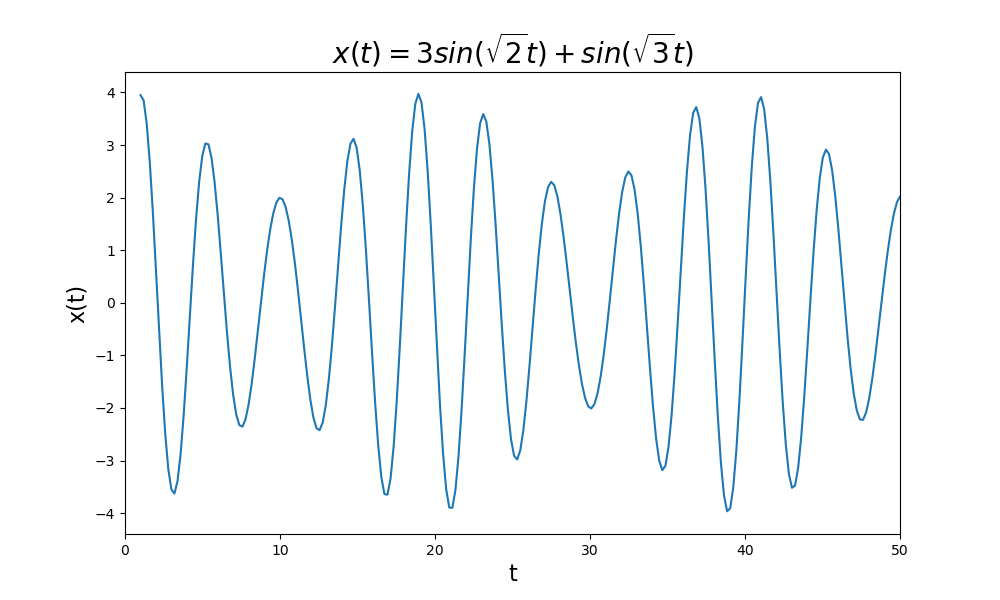

In [80]:
tspan = np.linspace(1,200,1000)
x = func(tspan)

# let's look at x(t)
plt.figure(figsize=(10,6))
plt.plot(tspan,x)

plt.xlabel('t', fontsize=16)
plt.ylabel('x(t)', fontsize=16)
plt.title(r'$x(t) = 3sin(\sqrt{2}t) + sin(\sqrt{3} t)$', fontsize=20)
plt.xlim(0,50)

# not chaotic; quasiperiodic

## Reconstruction Function

In [79]:
def reconstructPhase(sv, tau, n):
    '''
    reconstructPhase()
        samples state vector 'sv' at delay tau, with dimension n
        
    Parameters:
    -----------
    sv : state vector of one dimension of the system
    tau : integer time delay, in units of time steps
    n : integer number of dimensions for phase space reconstruction
    '''
    
    state = []
    for _ in range(n): state.append([])
    
    for i in range(0, len(sv)-(n*tau), tau):
        for dim in range(n):
            state[dim].append(sv[i+(dim*tau)])
            
    return state

## Let's reconstruct

Text(0.5, 1.0, '2D Reconstruction')

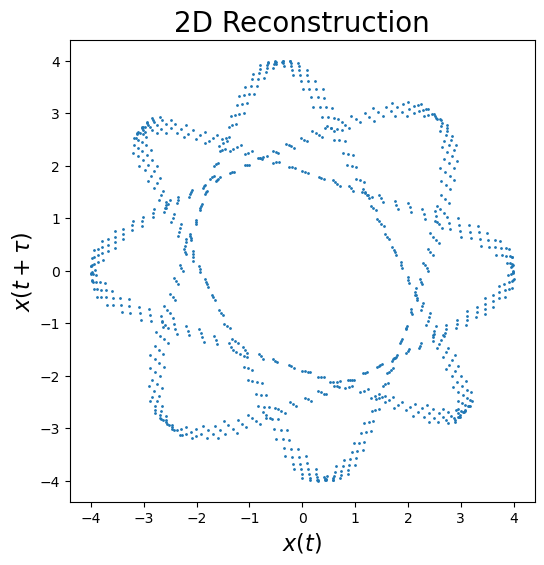

In [89]:
%matplotlib inline

tau = 21

# since we aren't actually integrating, tau is handled here
tspan = np.arange(0,20000,tau) #(start, stop, step)
y = func(tspan)

# now let's see what the phase space reconstruction does
# tau=1 for function input bc the delays are done in `tspan`
s2 = reconstructPhase(y, 1, 2)

fig = plt.figure(figsize=(6,6))

plt.scatter(s2[0], s2[1], s=1)
plt.xlabel(r'$x(t)$', fontsize=16)
plt.ylabel(r'$x(t+\tau)$', fontsize=16)
plt.title('2D Reconstruction', fontsize=20)

Text(0.5, 0.92, '3D Reconstruction')

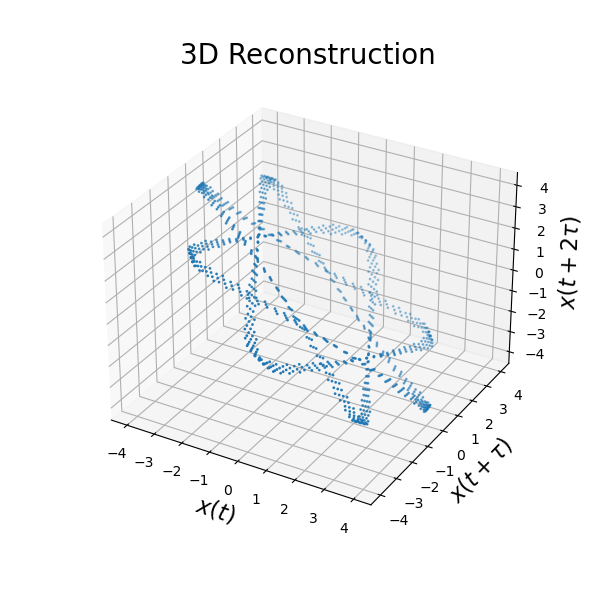

In [90]:
%matplotlib widget

s3 = reconstructPhase(y, 1, 3)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(s3[0], s3[1], s3[2], s=1)

ax.set_xlabel(r'$x(t)$', fontsize=16)
ax.set_ylabel(r'$x(t+\tau)$', fontsize=16)
ax.set_zlabel(r'$x(t+2\tau)$', fontsize=16)
ax.set_title('3D Reconstruction', fontsize=20)